In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('/kaggle/input/pulsar-dataset/pulsar_stars.csv')

In [11]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [12]:
df.shape

(17898, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [14]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [15]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [16]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

# Target variable


In [17]:
df.target_class.unique()

array([0, 1])

In [18]:
df.target_class.nunique()

2

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[14,6]


In [20]:
percentage=df['target_class'].value_counts()/len(df)

In [21]:
percentage

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

<Axes: xlabel='target_class', ylabel='count'>

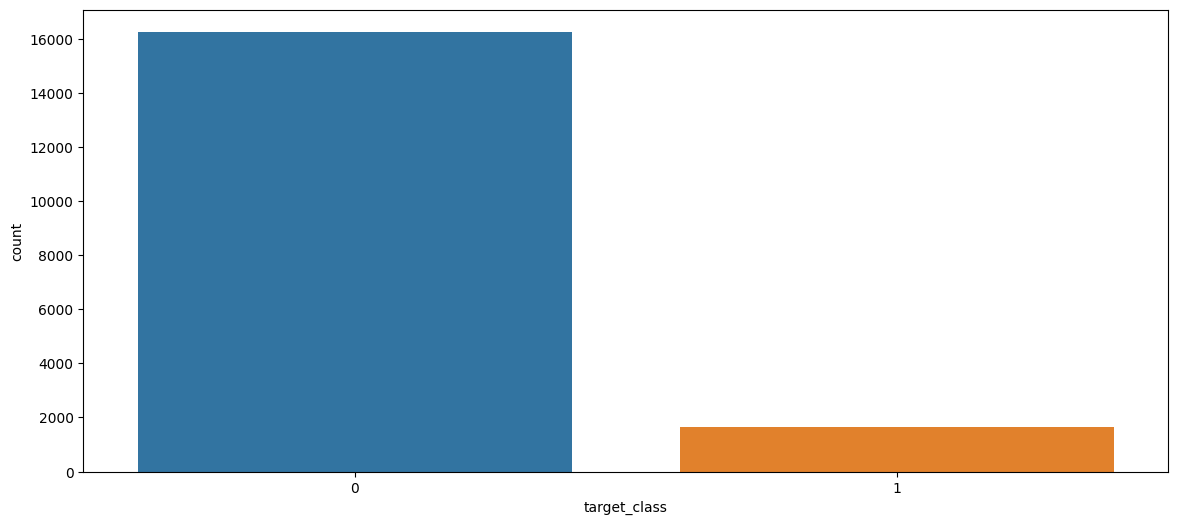

In [22]:
sns.countplot(x='target_class',data=df)

Text(0.5, 1.0, 'target_class')

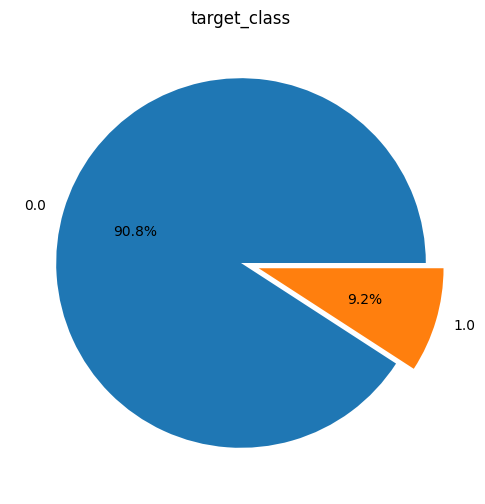

In [23]:
plt.pie(percentage,labels=['0.0','1.0'],autopct = '%.1f%%',explode=[0,0.1])
plt.title('target_class')

In [24]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [25]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [26]:
df.columns=['IP_mean','IP_Sd','IP_EK','IP_Skew','DM_SNR_mean','DM_SNR_Sd','DM_SNR_EK','DM_SNR_Skew','target_class']
df.columns

Index(['IP_mean', 'IP_Sd', 'IP_EK', 'IP_Skew', 'DM_SNR_mean', 'DM_SNR_Sd',
       'DM_SNR_EK', 'DM_SNR_Skew', 'target_class'],
      dtype='object')

<Axes: xlabel='IP_mean'>

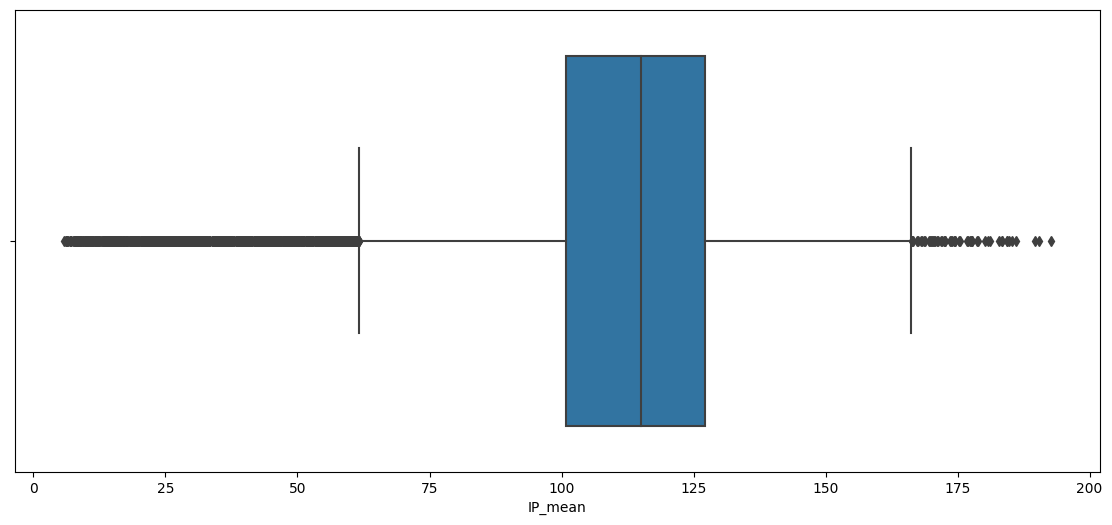

In [27]:
sns.boxplot(x='IP_mean',data=df)

<Axes: xlabel='IP_mean', ylabel='Count'>

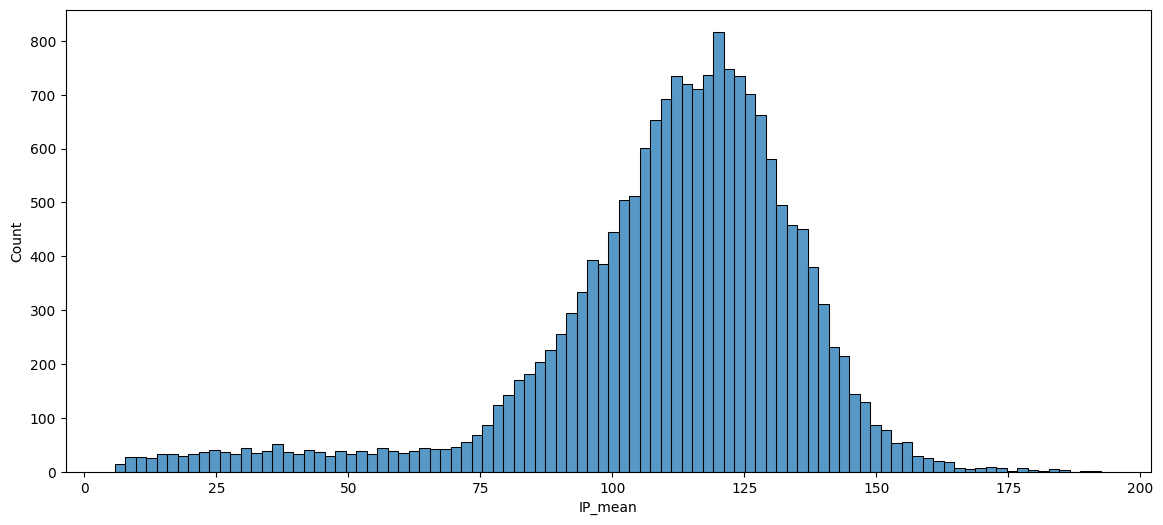

In [28]:
sns.histplot(data=df,x='IP_mean')

<Axes: xlabel='IP_mean', ylabel='Count'>

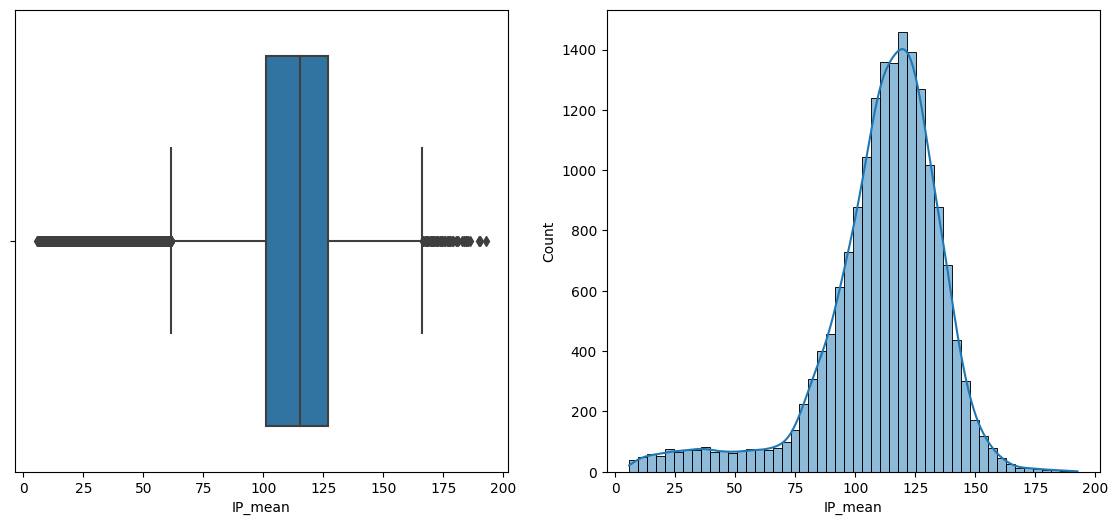

In [29]:
fig,(ax1,ax2) = plt.subplots(ncols=2)

sns.boxplot(x='IP_mean',data=df,ax=ax1)
sns.histplot(x='IP_mean',data=df,ax=ax2,bins=50,kde=True)

In [30]:
df.isnull().sum()

IP_mean         0
IP_Sd           0
IP_EK           0
IP_Skew         0
DM_SNR_mean     0
DM_SNR_Sd       0
DM_SNR_EK       0
DM_SNR_Skew     0
target_class    0
dtype: int64

In [31]:
df.columns

Index(['IP_mean', 'IP_Sd', 'IP_EK', 'IP_Skew', 'DM_SNR_mean', 'DM_SNR_Sd',
       'DM_SNR_EK', 'DM_SNR_Skew', 'target_class'],
      dtype='object')

In [32]:
df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [33]:
import numpy as np

In [34]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/len(df)

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IP_mean       17898 non-null  float64
 1   IP_Sd         17898 non-null  float64
 2   IP_EK         17898 non-null  float64
 3   IP_Skew       17898 non-null  float64
 4   DM_SNR_mean   17898 non-null  float64
 5   DM_SNR_Sd     17898 non-null  float64
 6   DM_SNR_EK     17898 non-null  float64
 7   DM_SNR_Skew   17898 non-null  float64
 8   target_class  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [36]:
df.isnull().sum()

IP_mean         0
IP_Sd           0
IP_EK           0
IP_Skew         0
DM_SNR_mean     0
DM_SNR_Sd       0
DM_SNR_EK       0
DM_SNR_Skew     0
target_class    0
dtype: int64

In [37]:
round(df.describe(),2)

,IP_mean,IP_Sd,IP_EK,IP_Skew,DM_SNR_mean,DM_SNR_Sd,DM_SNR_EK,DM_SNR_Skew,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


# Declare feature vector and target variable

In [38]:
X = df.drop(['target_class'],axis=1)

y = df['target_class']

In [39]:
X

,IP_mean,IP_Sd,IP_EK,IP_Skew,DM_SNR_mean,DM_SNR_Sd,DM_SNR_EK,DM_SNR_Skew
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [40]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target_class, Length: 17898, dtype: int64

In [51]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [43]:
cols = X_train.columns

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Run SVM with default hyperparameters

In [53]:
svc=SVC()
svc.fit(X_test,y_test)

SVC()

In [54]:
y_pred=svc.predict(X_test)
y_pred


array([0, 1, 0, ..., 0, 0, 1])

In [57]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [58]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.9818435754189944
Precision: 0.9705882352941176
Recall: 0.822429906542056
Confusion Matrix:
 [[3251    8]
 [  57  264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.97      0.82      0.89       321

    accuracy                           0.98      3580
   macro avg       0.98      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [59]:
svc=SVC(C=100)
svc.fit(X_test,y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.9818435754189944
Precision: 0.9705882352941176
Recall: 0.822429906542056
Confusion Matrix:
 [[3251    8]
 [  57  264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.97      0.82      0.89       321

    accuracy                           0.98      3580
   macro avg       0.98      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [60]:
#c=100
linear_svc=SVC(kernel='linear' ,C=100)
linear_svc.fit(X_test,y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.9818435754189944
Precision: 0.9705882352941176
Recall: 0.822429906542056
Confusion Matrix:
 [[3251    8]
 [  57  264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.97      0.82      0.89       321

    accuracy                           0.98      3580
   macro avg       0.98      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [61]:
sigmoid_svc=SVC(kernel='sigmoid' ,C=100)
sigmoid_svc.fit(X_test,y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.9818435754189944
Precision: 0.9705882352941176
Recall: 0.822429906542056
Confusion Matrix:
 [[3251    8]
 [  57  264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.97      0.82      0.89       321

    accuracy                           0.98      3580
   macro avg       0.98      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



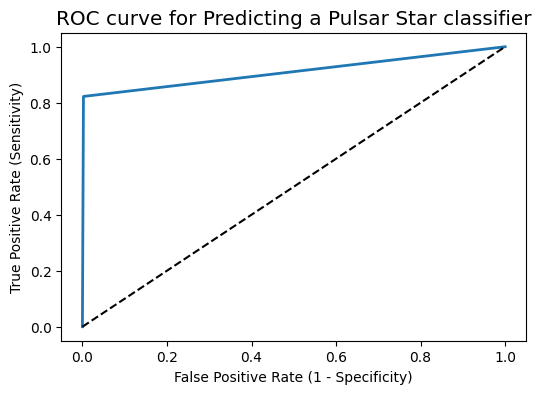

In [62]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [63]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9100


In [64]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9762


In [65]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [66]:
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [67]:
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))


Average stratified cross-validation score with linear kernel:0.9789


In [68]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [69]:
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97849162 0.97011173 0.97318436 0.9709416  0.96982397]


In [70]:
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9725


In [71]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

svc=SVC()

parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [72]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9800


Parameters that give the best results : 

 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=100, gamma=0.1)


In [73]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9807


In [74]:
#There are outliers in our dataset. So, as I increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.

#We get maximum accuracy with rbf and linear kernel with C=100.0 and the accuracy is 0.9832. So, we can conclude that our model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore confusion matrix that provide better guidance in selecting models.

#ROC AUC of our model is very close to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

#I obtain higher average stratified k-fold cross-validation score of 0.9789 with linear kernel but the model accuracy is 0.9832. So, stratified cross-validation technique does not help to improve the model performance.

#Our original model test accuracy is 0.9832 while GridSearch CV score on test-set is 0.9835. So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.